In [2]:
#Import all necessary libraries
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 12})

# Q1: What has the overall trend of shootings year over year been in NYC?

In [3]:
#import data
shootings = pd.read_csv("NYPD_Shooting_Incident_Data__Historic_.csv")
shootings.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,201575314,08/23/2019,22:10:00,QUEENS,103,0.00,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1037451,193561,40.70,-73.81,POINT (-73.80814071699996 40.697805308000056)
1,205748546,11/27/2019,15:54:00,BRONX,40,0.00,NaN,False,<18,M,BLACK,25-44,F,BLACK,1006789,237559,40.82,-73.92,POINT (-73.91857061799993 40.81869973000005)
2,193118596,02/02/2019,19:40:00,MANHATTAN,23,0.00,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,999347,227795,40.79,-73.95,POINT (-73.94547965999999 40.791916091000076)
3,204192600,10/24/2019,00:52:00,STATEN ISLAND,121,0.00,PVT HOUSE,True,25-44,M,BLACK,25-44,F,BLACK,938149,171781,40.64,-74.17,POINT (-74.16610830199996 40.63806398200006)
4,201483468,08/22/2019,18:03:00,BRONX,46,0.00,NaN,False,25-44,M,BLACK HISPANIC,18-24,M,BLACK,1008224,250621,40.85,-73.91,POINT (-73.91333944399999 40.85454734900003)


In [4]:
#checking the columns of the of data
shootings.columns

Index(['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'PRECINCT',
       'JURISDICTION_CODE', 'LOCATION_DESC', 'STATISTICAL_MURDER_FLAG',
       'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'VIC_AGE_GROUP', 'VIC_SEX',
       'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude',
       'Lon_Lat'],
      dtype='object')

In [5]:
#creating a MONTH_YEAR and YEAR column to extract the month and year information from the OCCUR_DATE column
shootings['MONTH_YEAR'] = pd.to_datetime(shootings['OCCUR_DATE']).dt.to_period('M')
shootings['YEAR'] = pd.DatetimeIndex(shootings['OCCUR_DATE']).year
shootings.columns

Index(['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'PRECINCT',
       'JURISDICTION_CODE', 'LOCATION_DESC', 'STATISTICAL_MURDER_FLAG',
       'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'VIC_AGE_GROUP', 'VIC_SEX',
       'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude',
       'Lon_Lat', 'MONTH_YEAR', 'YEAR'],
      dtype='object')

In [6]:
#create dataframe of incidents data from 2015 onwards
shootings2015 = shootings[shootings['YEAR'] > 2014]
shootings2015[['OCCUR_DATE','YEAR','MONTH_YEAR']]

,OCCUR_DATE,YEAR,MONTH_YEAR
0,08/23/2019,2019,2019-08
1,11/27/2019,2019,2019-11
2,02/02/2019,2019,2019-02
3,10/24/2019,2019,2019-10
4,08/22/2019,2019,2019-08
...,...,...,...
23563,08/21/2020,2020,2020-08
23564,07/03/2020,2020,2020-07
23565,11/21/2020,2020,2020-11
23566,01/18/2020,2020,2020-01


In [7]:
# creating a new dataframe timeseries_year to group incidents by year
timeseries_year = shootings2015.groupby(shootings['YEAR'])
timeseries_year = pd.DataFrame(timeseries_year.size().reset_index(name = "INCIDENT_COUNT"))
timeseries_year

,YEAR,INCIDENT_COUNT
0,2015,1434
1,2016,1208
2,2017,969
3,2018,951
4,2019,967
5,2020,1942


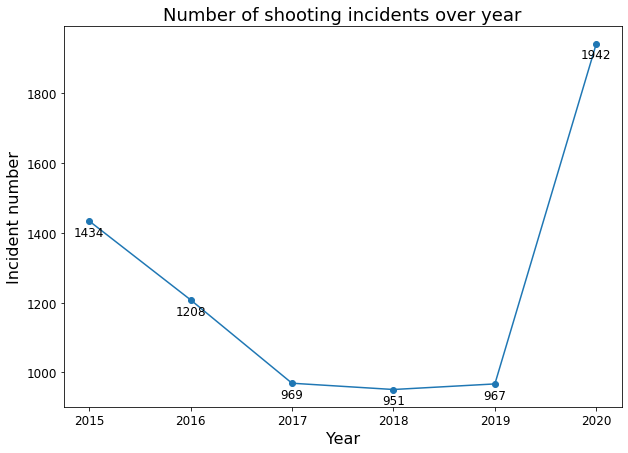

In [8]:
# plotting the incident trend over years
fig, ax = plt.subplots(figsize=(10, 7))


x = timeseries_year['YEAR']
y = timeseries_year['INCIDENT_COUNT']

plt.plot(x,y,marker = 'o')
plt.title('Number of shooting incidents over year', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Incident number', fontsize = 16)


for X,Y in zip(x,y):

    label = "{:.0f}".format(Y)

    plt.annotate(label, 
                 (X,Y), 
                 textcoords="offset points",
                 xytext=(0,-15), 
                 ha='center') 

plt.show()


In [9]:
# creating a new dataframe timeseries_year to group incidents by month and year
timeseries_monthyear = shootings2015.groupby(shootings['MONTH_YEAR'].dt.strftime('%Y-%m'))
timeseries_monthyear = pd.DataFrame(timeseries_monthyear.size().reset_index(name = "INCIDENT_COUNT"))
timeseries_monthyear

,MONTH_YEAR,INCIDENT_COUNT
0,2015-01,117
1,2015-02,68
2,2015-03,93
3,2015-04,106
4,2015-05,181
...,...,...
67,2020-08,312
68,2020-09,186
69,2020-10,168
70,2020-11,138


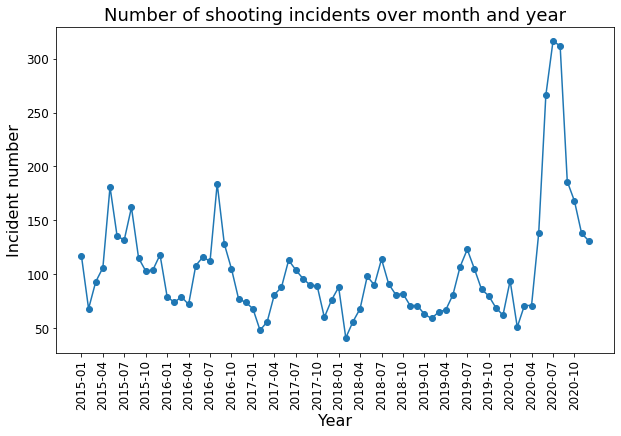

In [10]:
# plotting the incident trend over years
fig, ax = plt.subplots(figsize=(10, 6))

x = timeseries_monthyear['MONTH_YEAR']
y = timeseries_monthyear['INCIDENT_COUNT']

plt.plot(x,y,marker = 'o')
plt.title('Number of shooting incidents over month and year', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Incident number', fontsize = 16)
plt.xticks(rotation='vertical')
ax.xaxis.set_major_locator(plt.IndexLocator(3, 0))
plt.show()


# Q2: What is the profile of perpetrators of shootings in NYC?

<AxesSubplot:title={'center':'Incident count by perpetuator age'}, xlabel='PERP_AGE_GROUP'>

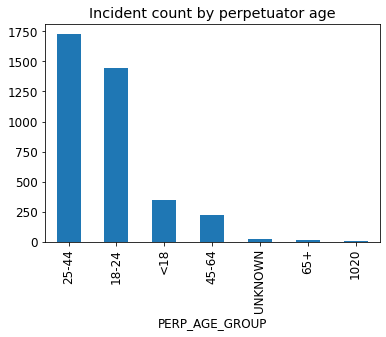

In [11]:
# showing number of incidents perpetuated by each age group
shootings2015.groupby(shootings['PERP_AGE_GROUP']).size().sort_values(ascending = False).plot(
    kind='bar', title= 'Incident count by perpetuator age')

<AxesSubplot:title={'center':'Incident count by perpetuator sex'}, xlabel='PERP_SEX'>

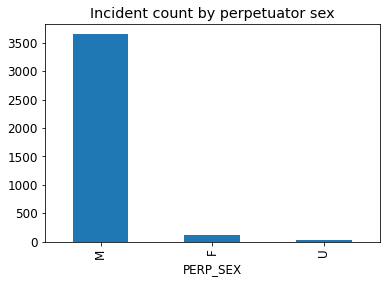

In [12]:
# showing number of incidents by the sex of perpetuator
shootings2015.groupby(shootings['PERP_SEX']).size().sort_values(ascending = False).plot(
    kind='bar', title= 'Incident count by perpetuator sex')

<AxesSubplot:title={'center':'Incident count by perpetuator race'}, xlabel='PERP_RACE'>

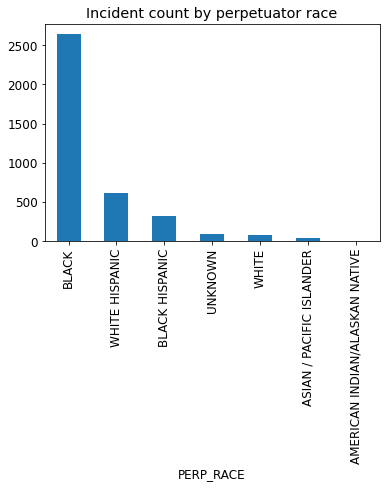

In [13]:
# showing number of incidents by the race of perpetuator
shootings2015.groupby(shootings['PERP_RACE']).size().sort_values(ascending = False).plot(
    kind='bar', title= 'Incident count by perpetuator race', rot = 90)

In [14]:
# understanding the intersectional identify of perpetuator
perpetrator = shootings2015.groupby(['PERP_AGE_GROUP','PERP_SEX','PERP_RACE'])
perpetrator = pd.DataFrame(perpetrator.size().sort_values(ascending = False).reset_index(name = "INCIDENT_COUNT"))
perpetrator.head(10)

,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,INCIDENT_COUNT
0,25-44,M,BLACK,1172
1,18-24,M,BLACK,987
2,25-44,M,WHITE HISPANIC,266
3,<18,M,BLACK,252
4,18-24,M,WHITE HISPANIC,240
5,45-64,M,BLACK,144
6,18-24,M,BLACK HISPANIC,136
7,25-44,M,BLACK HISPANIC,127
8,<18,M,WHITE HISPANIC,49
9,25-44,F,BLACK,44


In [16]:
# looking at the top 10 groups of perpetuator especially age group and sex which are more relevant to our later analysis
perpetrator['PERP'] = perpetrator['PERP_AGE_GROUP'] + ', ' + perpetrator['PERP_SEX'] 
top_perpetrator = perpetrator.head(10)
del top_perpetrator['PERP_AGE_GROUP'] , top_perpetrator['PERP_SEX']
top_perpetrator = top_perpetrator[['PERP','INCIDENT_COUNT']]
top_perpetrator

,PERP,INCIDENT_COUNT
0,"25-44, M",1172
1,"18-24, M",987
2,"25-44, M",266
3,"<18, M",252
4,"18-24, M",240
5,"45-64, M",144
6,"18-24, M",136
7,"25-44, M",127
8,"<18, M",49
9,"25-44, F",44


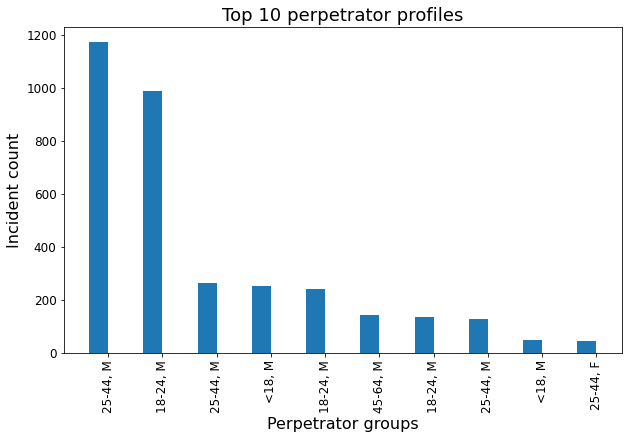

In [18]:
# plot graph

x = np.arange(len(top_perpetrator.index))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, top_perpetrator['INCIDENT_COUNT'], width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Perpetrator groups', fontsize = 16)
ax.set_ylabel('Incident count', fontsize = 16)
ax.set_title('Top 10 perpetrator profiles', fontsize = 18)
ax.set_xticks(x)
ax.set_xticklabels(top_perpetrator.PERP, rotation = 90, fontsize = 12)

plt.show()